In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube as sc
import astropy.units as U
import astropy.constants as const
import warnings
warnings.filterwarnings('ignore')

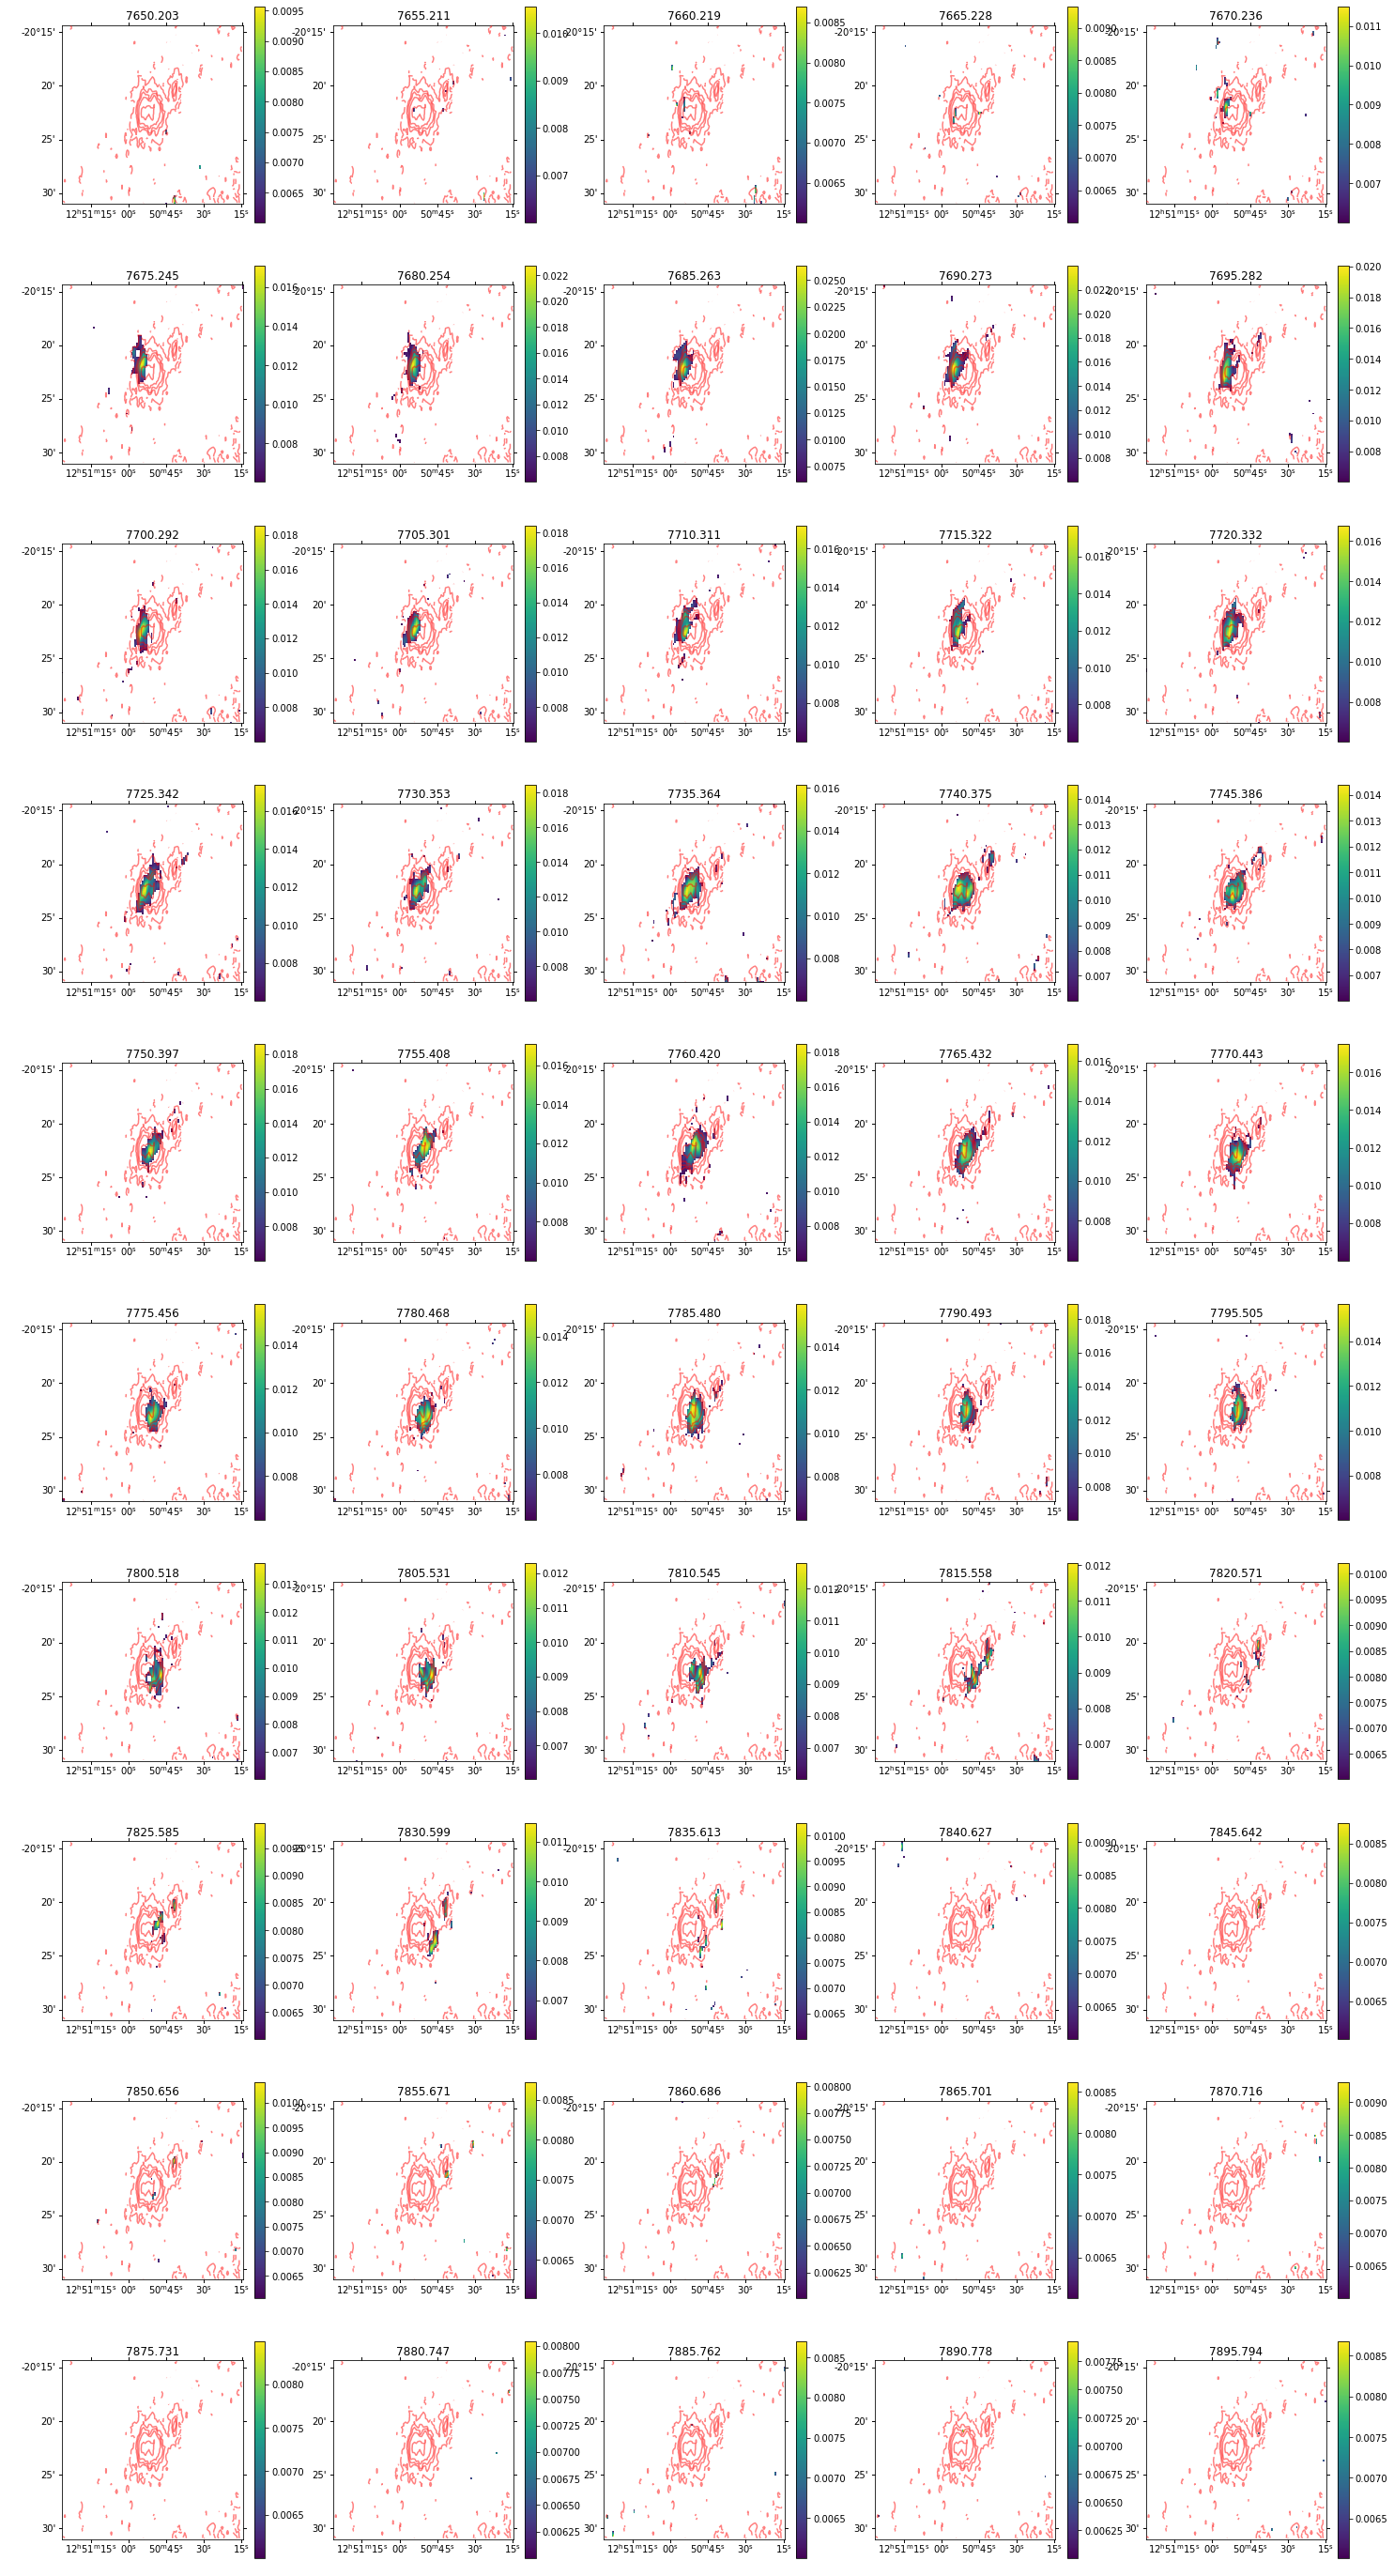

In [2]:
path="G2-data/ATCA/"
cubeim=path+'j1250-atca.fits'

sccube=sc.read(cubeim)
velcube=sccube.with_spectral_unit(unit=U.km/U.s, velocity_convention='optical',rest_value=1.420405761768*U.GHz) #Converting cube to vel scale
velcube_chan=velcube[50:100,:,:] #channel cuts 
mask= (velcube_chan > 0.006 *U.Jy/U.beam)
vel_masked=velcube_chan.with_mask(mask)
mom0=vel_masked.moment(order=0) #mom0
mom0.write(path+'j1250-atca.mom0.fits', overwrite=True)
vel_masked.write(path+'J1250velmasked.fits', overwrite=True)

levels =[0.1,0.4, 0.57, 0.8, 1.27]
#levels = [3.5e19, 7e19, 20e19, 30e19, 40e19, 45e19]  # Define contour levels to use

plt.figure(figsize=(25,50))
for ii, i in enumerate(vel_masked.spectral_axis, start=1):
    #print(i,'',ii)
    ax = plt.subplot(10,5,ii, projection=vel_masked[0].wcs)
    im=ax.imshow(vel_masked[ii-1,:,:].value)
    ax.set_xlabel(' ')
    ax.set_ylabel(' ')
    plt.colorbar(im)
    ax.set_title('%.3f'%(vel_masked.spectral_axis[ii-1].value)) 
    ax.contour(mom0.data, colors=['red'], alpha=0.5, levels=levels)

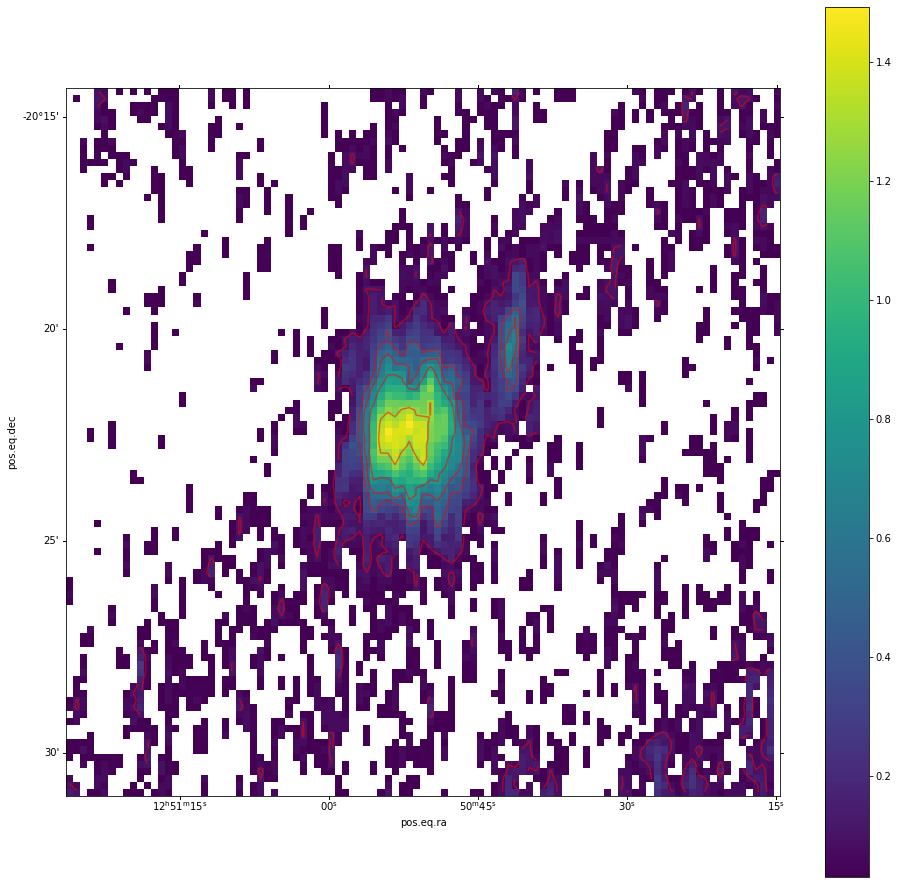

In [3]:
plt.figure(figsize=(16,16))
mo=plt.subplot(1,1,1,projection=velcube_chan[0].wcs)
mom0plt=mo.imshow(mom0.data)
plt.colorbar(mom0plt,ax=mo)
mo.contour(mom0.data, colors=['red'], alpha=0.5, levels=levels)

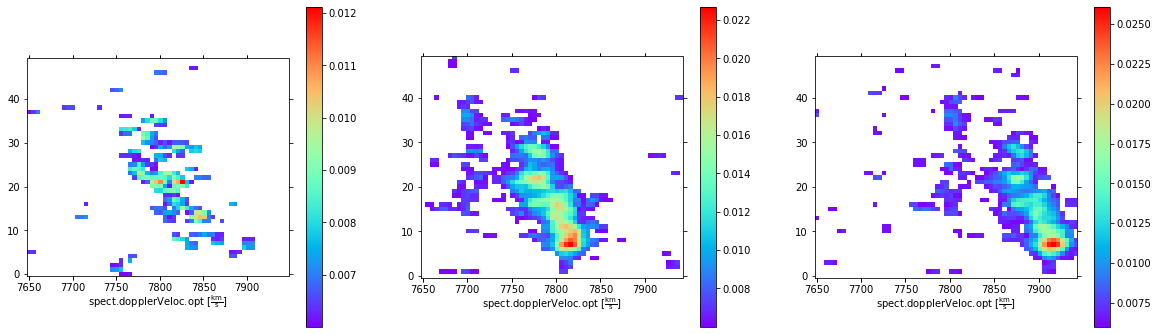

In [4]:
#PV Slice extractor and SpectralCube

from pvextractor import extract_pv_slice
from pvextractor.geometry import PathFromCenter
from astropy.coordinates import SkyCoord

#Optical PA
coords1 = SkyCoord('12h50m52.88s -20d22m15.65s')
paths1 = PathFromCenter(center=coords1, length=10 * U.arcmin, angle=123.9 * U.deg, width=1 * U.arcsec)
pvs1 = extract_pv_slice(vel_masked[:,:,:], paths1)

coords2 = SkyCoord('12h50m40.91s -20d20m06.22s')
paths2 = PathFromCenter(center=coords2, length=10 * U.arcmin, angle=122.1 * U.deg, width=1 * U.arcsec)
pvs2 = extract_pv_slice(vel_masked[:,:,:], paths2)

#By Eye general
coordg2 = SkyCoord('12h50m47.3789s -20d21m15.507s')
pathg2 = PathFromCenter(center=coordg2, length=10 * U.arcmin, angle=38 * U.deg, width=1 * U.arcsec)
pvg2 = extract_pv_slice(vel_masked[:,:,:], pathg2)

#pv.writeto(path+'my_slice.fits',) 

plt.figure(figsize=(20,20))
ag2 = plt.subplot(3,3,1,projection=vel_masked.wcs, slices=(0,0,'x'))
pvg2im=ag2.imshow(pvg2.data, origin='lower', cmap='rainbow')
ag2.coords[2].set_format_unit(U.km / U.s)
ag2.coords[1].set_format_unit(U.arcmin)
ag2.coords[0].set_format_unit(U.arcmin)
#ag2.yaxis.set_visible(False)
plt.colorbar(pvg2im)

as1 = plt.subplot(3,3,2,projection=vel_masked.wcs, slices=(0,0,'x'))
pvs1im=as1.imshow(pvs1.data,origin='lower', cmap='rainbow')
plt.colorbar(pvs1im)
as1.coords[2].set_format_unit(U.km / U.s)
as1.coords[1].set_format_unit(U.arcmin)
as1.coords[0].set_format_unit(U.arcmin)

as2 = plt.subplot(3,3,3,projection=vel_masked.wcs, slices=(0,0,'x'))
pvs2im=as2.imshow(pvs2.data, cmap='rainbow')
plt.colorbar(pvs2im)
as2.coords[2].set_format_unit(U.km / U.s)
as2.coords[1].set_format_unit(U.arcmin)
as2.coords[0].set_format_unit(U.arcmin)

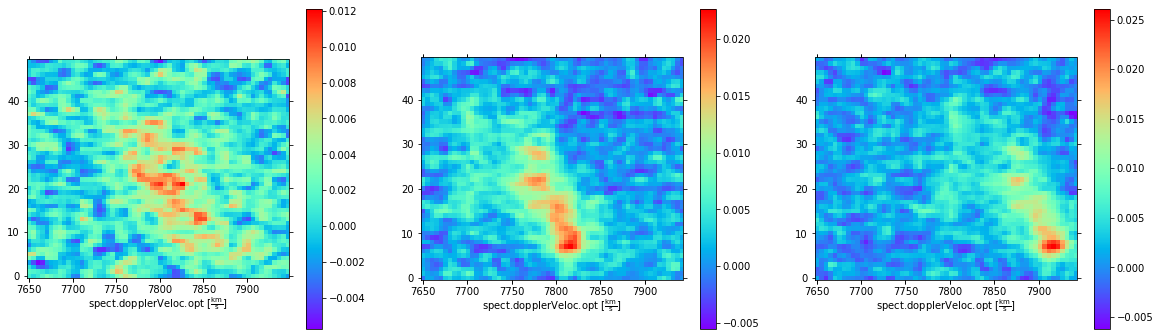

In [5]:
#PV Slice extractor and SpectralCube

from pvextractor import extract_pv_slice
from pvextractor.geometry import PathFromCenter
from astropy.coordinates import SkyCoord

#Optical PA
coords1 = SkyCoord('12h50m52.88s -20d22m15.65s')
paths1 = PathFromCenter(center=coords1, length=10 * U.arcmin, angle=123.9 * U.deg, width=1 * U.arcsec)
pvs1 = extract_pv_slice(velcube_chan[:,:,:], paths1)

coords2 = SkyCoord('12h50m40.91s -20d20m06.22s')
paths2 = PathFromCenter(center=coords2, length=10 * U.arcmin, angle=122.1 * U.deg, width=1 * U.arcsec)
pvs2 = extract_pv_slice(velcube_chan[:,:,:], paths2)

#By Eye general
coordg2 = SkyCoord('12h50m47.3789s -20d21m15.507s')
pathg2 = PathFromCenter(center=coordg2, length=10 * U.arcmin, angle=38 * U.deg, width=1 * U.arcsec)
pvg2 = extract_pv_slice(velcube_chan[:,:,:], pathg2)

#pv.writeto(path+'my_slice.fits',) 

plt.figure(figsize=(20,20))
ag2 = plt.subplot(3,3,1,projection=velcube_chan.wcs, slices=(0,0,'x'))
pvg2im=ag2.imshow(pvg2.data, origin='lower', cmap='rainbow')
ag2.coords[2].set_format_unit(U.km / U.s)
ag2.coords[1].set_format_unit(U.arcmin)
ag2.coords[0].set_format_unit(U.arcmin)
#ag2.yaxis.set_visible(False)
plt.colorbar(pvg2im)

as1 = plt.subplot(3,3,2,projection=velcube_chan.wcs, slices=(0,0,'x'))
pvs1im=as1.imshow(pvs1.data,origin='lower', cmap='rainbow')
plt.colorbar(pvs1im)
as1.coords[2].set_format_unit(U.km / U.s)
as1.coords[1].set_format_unit(U.arcmin)
as1.coords[0].set_format_unit(U.arcmin)

as2 = plt.subplot(3,3,3,projection=velcube_chan.wcs, slices=(0,0,'x'))
pvs2im=as2.imshow(pvs2.data, cmap='rainbow')
plt.colorbar(pvs2im)
as2.coords[2].set_format_unit(U.km / U.s)
as2.coords[1].set_format_unit(U.arcmin)
as2.coords[0].set_format_unit(U.arcmin)

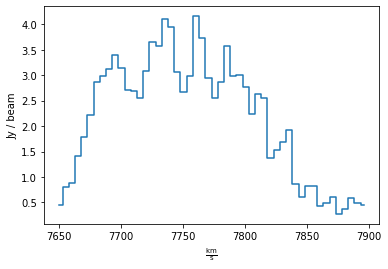

In [6]:
#Extract Spectrum

spec = vel_masked.sum(axis=(1,2))  
spec.quicklook()

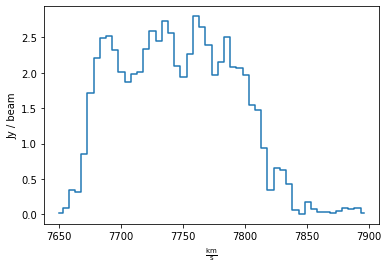

In [7]:
## Masked Spectrum Extraction -G2S1
import regions

crtf_g2s1 = "ellipse[[12h50m52.84s, -20:22:15.65],[3.5arcmin, 112arcsec],0deg] coord=J2000"
cubeg2s1 = vel_masked.subcube_from_crtfregion(crtf_g2s1)

#cubeg2s1[25,:,:].quicklook()
specg2s1 = cubeg2s1.sum(axis=(1, 2)) #/ (102.96 * 30.86)* U.beam
specg2s1.quicklook()

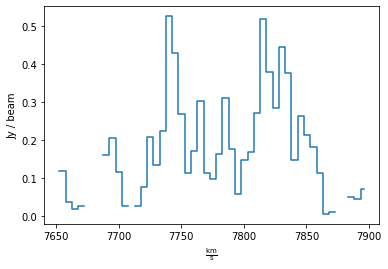

In [8]:
## Masked Spectrum Extraction -G1S2 -  Channel masking not done
crtf_g2s2 = "ellipse[[12h50m40.91s, -020.20.06.22], [2arcmin, 1arcmin], 0deg] coord=J2000"
cubeg2s2 = vel_masked.subcube_from_crtfregion(crtf_g2s2)
#cubeg2s2[25,:,:].quicklook()
specg2s2 = cubeg2s2.sum(axis=(1, 2)) #* (102.96 * 30.86)/2* U.beam
specg2s2.quicklook()

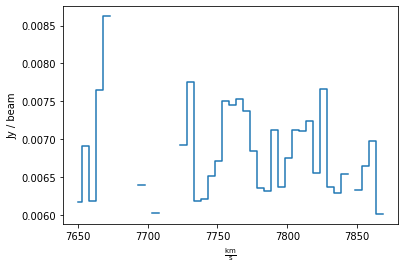

In [9]:
## Masked Spectrum Extraction -G2-bridge - Channel masking not done

bridgeg2 = "ellipse[[12h50m45.295s, -020:21:10.2215], [2arcmin, 26arcsec], 15deg] coord=J2000"
cubeg2b = vel_masked.subcube_from_crtfregion(bridgeg2)
#cubeg1b[25,:,:].quicklook()
specg2b = cubeg2b.mean(axis=(1, 2)) 
specg2b.quicklook()

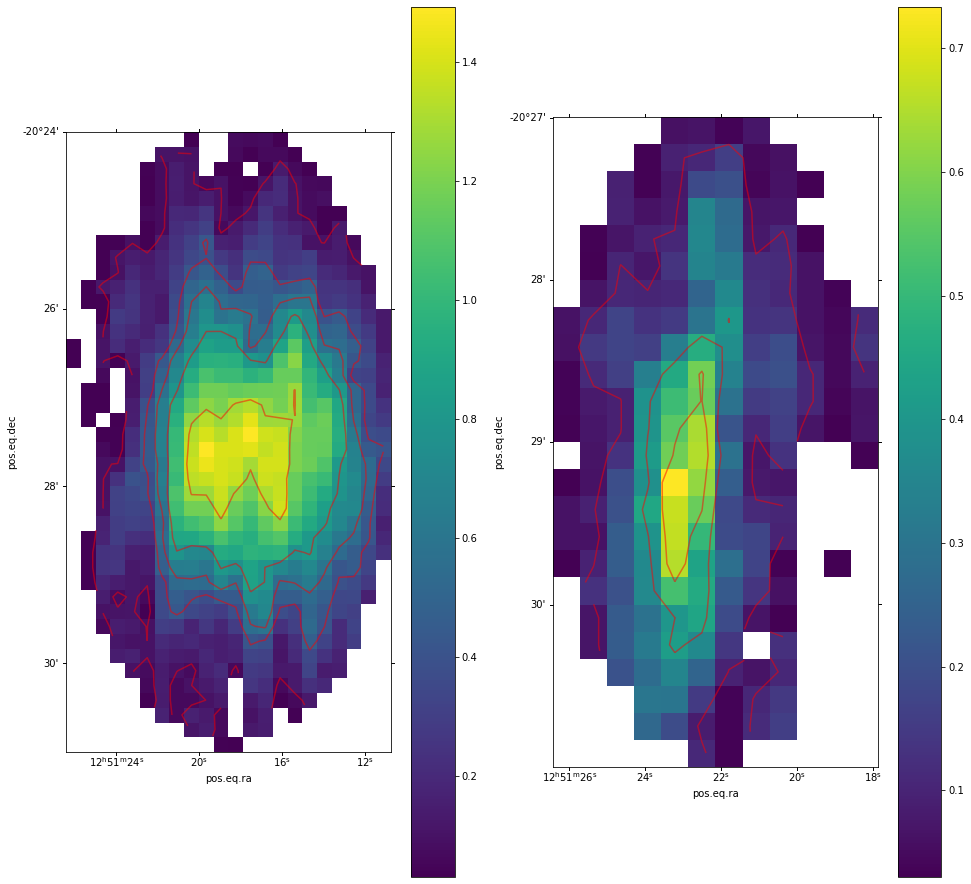

In [10]:
#Moment 0 for S1 and S2 using spectral cube 

mom0s1=cubeg2s1.moment(order=0) #mom0
mom0s1.write(path+'g2s1-mom0.fits', overwrite=True)
plt.figure(figsize=(16,16))
g2s1m0=plt.subplot(1,2,1,projection=vel_masked[0].wcs)
mom0s1plt=g2s1m0.imshow(mom0s1.value)
plt.colorbar(mom0s1plt,ax=g2s1m0)
g2s1m0.contour(mom0s1.data, colors=['red'], alpha=0.5, levels=levels)

mom0s2=cubeg2s2.moment(order=0) #mom0
mom0s2.write(path+'g2s2-mom0.fits', overwrite=True)
g2s2m0=plt.subplot(1,2,2,projection=vel_masked[0].wcs)
mom0s2plt=g2s2m0.imshow(mom0s2.value)
plt.colorbar(mom0s2plt,ax=g2s2m0)
g2s2m0.contour(mom0s2.data, colors=['red'], alpha=0.5, levels=levels)

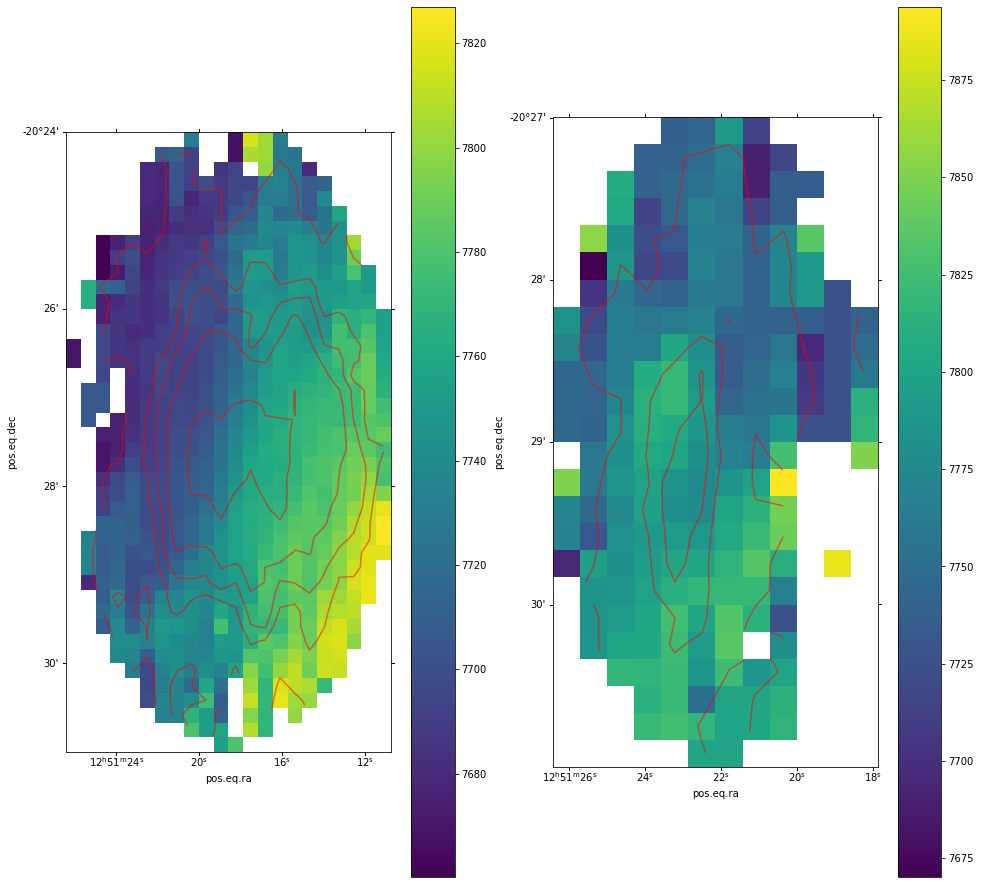

In [11]:
#Moment 1 for S1 and S2 using spectral cube 

mom1s1=cubeg2s1.moment(order=1) #mom1
#mom1s1.write(path+'g2s1-mom1.fits', overwrite=True)
plt.figure(figsize=(16,16))
g2s1m1=plt.subplot(1,2,1,projection=vel_masked[0].wcs)
mom1s1plt=g2s1m1.imshow(mom1s1.value)
plt.colorbar(mom1s1plt,ax=g2s1m1)
g2s1m1.contour(mom0s1.data, colors=['red'], alpha=0.5, levels=levels)

mom1s2=cubeg2s2.moment(order=1) #mom1
#mom1s2.write(path+'g2s2-mom1.fits', overwrite=True)
g2s2m1=plt.subplot(1,2,2,projection=vel_masked[0].wcs)
mom1s2plt=g2s2m1.imshow(mom1s2.value)
plt.colorbar(mom1s2plt,ax=g2s2m1)
g2s2m1.contour(mom0s2.data, colors=['red'], alpha=0.5, levels=levels)

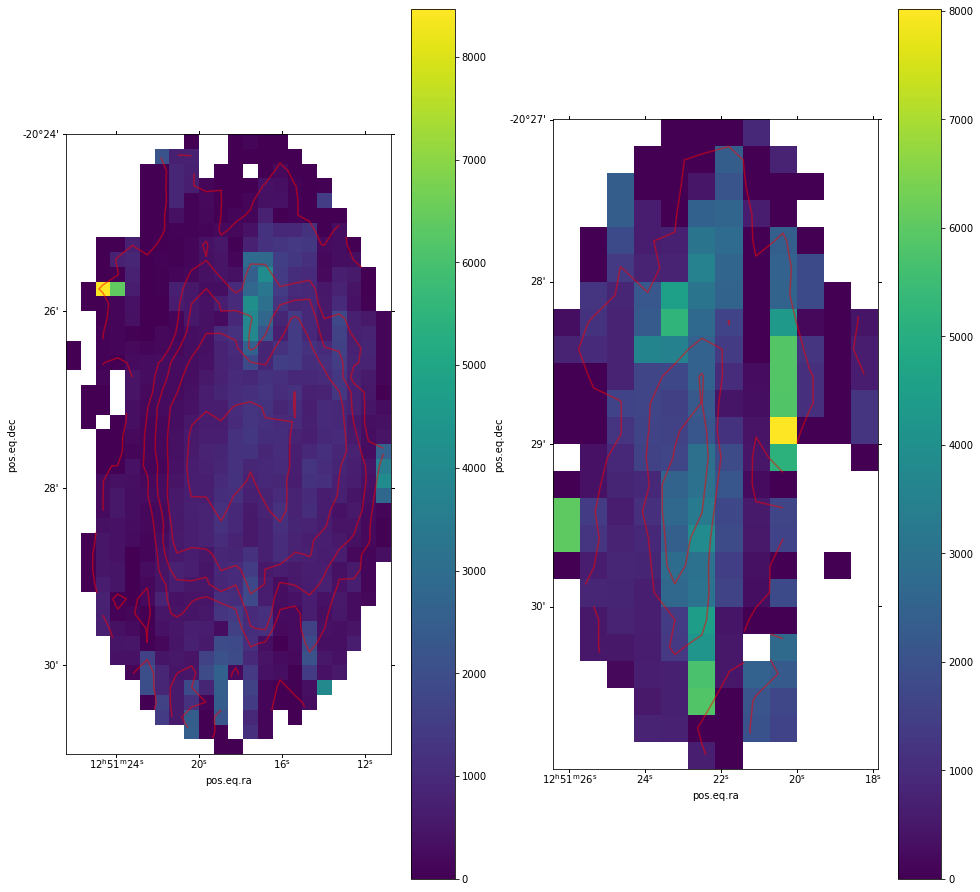

In [12]:
#Moment 2 for S1 and S2 using spectral cube 

mom2s1=cubeg2s1.moment(order=2) #mom2
#mom2s1.write(path+'g2s1-mom2.fits', overwrite=True)
plt.figure(figsize=(16,16))
g2s1m2=plt.subplot(1,2,1,projection=vel_masked[0].wcs)
mom2s1plt=g2s1m2.imshow(mom2s1.value)
plt.colorbar(mom2s1plt,ax=g2s1m2)
g2s1m2.contour(mom0s1.data, colors=['red'], alpha=0.5, levels=levels)

mom2s2=cubeg2s2.moment(order=2) #mom2
#mom2s2.write(path+'g2s2-mom2.fits', overwrite=True)
g2s2m2=plt.subplot(1,2,2,projection=vel_masked[0].wcs)
mom2s2plt=g2s2m2.imshow(mom2s2.value)
plt.colorbar(mom2s2plt,ax=g2s2m2)
g2s2m2.contour(mom0s2.data, colors=['red'], alpha=0.5, levels=levels)

In [13]:
### Beam Area in number of pixels
def beamArea(bmaj,bmin, cellx, celly):
    cellArea = cellx * celly
    bmaj = bmaj * 3600.0
    bmin = bmin * 3600.0
    fac  = np.pi / (4.0 * np.log(2.0))
    bArea = fac * bmaj * bmin
    return bArea / cellArea

### Obtain beam parameters from FITS file
def beam(fitsfile):
    f = fits.open(fitsfile)
    h = f[0].header
    bmaj = h['BMAJ']
    bmin = h['BMIN']
    cellx  = 3600. * np.abs(h['CDELT1'])
    celly  = 3600. * np.abs(h['CDELT2'])
    try:
        bpa  = h['BPA']
    except KeyError:
        bpa = np.nan
    return bmaj, bmin, bpa, cellx, celly

### Determine flux density
def fluxDens(fitsfile, flg):
    f = fits.open(fitsfile)
    data = f[0].data

    if len(data.shape) > 2:
        data = data[0]
    
    bpars = beam(fitsfile)
    area  = beamArea(bpars[0],bpars[1], bpars[3], bpars[4])
    print('Beam Area = %.2f' %area)
    
    if flg == 0:
        flux=np.nansum(data)
        return flux/area, np.nanstd(data)
        print('You used nansum')
    elif flg == 1:

        fluxes = []
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if not np.isnan(data[i,j]):
                    fluxes.append(data[i,j])

        flux  = np.sum(fluxes)
        print('You used For Loop')
        return flux/area, np.std(fluxes)

### Calculate HI mass
mom0map=path+'j1250-atca.mom0.fits'     #'j1250-atca.mom0.fits' #'g2s1-mom0.fits'
flag=0 # 0 for nansum 1 for for loop

lineflux, flerr = fluxDens(mom0map, flag)
galDist = 114

galMass = 2.36e5 * (galDist**2) * lineflux
logMass = np.log10(galMass)

print(lineflux, ' +/- ', flerr)
print('Log HI mass = ',logMass)

Beam Area = 36.00
14.913968390313459  +/-  0.24287888
Log HI mass =  10.660314923925176


Beam Area = 36.00

### S1
9.315674547870191
Log HI mass =  10.455936013271579

### S2
1.083965402503478
Log HI mass =  9.521737126460168

### S1+S2
14.913968390313459  +/-  0.24287888
Log HI mass =  10.660314923925176